In [29]:
import os
import sys


def report_python_env_info():
    # Where are we !?
    print(f"Current working directory (cwd):\n  {os.getcwd()}")
    print(f"Python version:\n  {sys.version}")
    print(f"Full path to python executable:\n  {sys.executable}")


report_python_env_info()


Current working directory (cwd):
  /home/brandon/Omdena/Omdena HeartKinetics/HeartKinetics - Project
Python version:
  3.9.16 (main, Jan 11 2023, 16:05:54) 
[GCC 11.2.0]
Full path to python executable:
  /home/brandon/anaconda3/bin/python


# RecordReader

In [30]:
import xarray as xr
import json
from typing import Union
from pathlib import Path
import glob


def to_path(p: Union[str, Path]) -> Path:
    return p if isinstance(p, Path) else Path(p)


def find_records(path: str):
    search_path: str = f"{path}/**/signals/"
    all_paths = list(map(lambda x: str(to_path(x).parent),
                     glob.glob(search_path, recursive=True)))
    return all_paths


class RecordReader():
    def __init__(self, path: Union[str, Path]):
        self.path = to_path(path)

    def load_signal(self, sig_name):
        return xr.open_zarr(self.path / "signals" / sig_name / "dataset")

    def load_metadata(self):
        with open(self.path / "meta.json", "r") as meta:
            return json.load(meta)

    def load_crf_metadata(self):
        with open(self.path / "crf.json", "r") as meta:
            return json.load(meta)


In [31]:
records = find_records(("./"))
records


['Dataset1/MMC-HFrEF/KINO/Sub-EY/MMC-HFrEF_EY_kinoV1_20190107-153210_gwd5ar2K2tvvIo',
 'Dataset1/MMC-HFrEF/KINO/Sub-MT/MMC-HFrEF_MT_kinoV1_20191210-161556_gwX8ymbEkuvvIo',
 'Dataset1/MMC-HFrEF/KINO/Sub-WZ/MMC-HFrEF_WZ_kinoV1_20190930-145749_1WdAWm9mNfOGux',
 'Dataset1/MMC-HFrEF/KINO/Sub-YI/MMC-HFrEF_YI_kinoV1_20190909-150010_gwkwwq1lvIvvIo',
 'Dataset1/MMC-HFrEF/KINO/Sub-MV/MMC-HFrEF_MV_kinoV1_20190103-124526_gwdW4mA7nivvIo',
 'Dataset1/MMC-HFrEF/KINO/Sub-RK/MMC-HFrEF_RK_kinoV1_20190506-142648_gwo4YOgXnIvvIo',
 'Dataset1/MMC-HFrEF/KINO/Sub-YT/MMC-HFrEF_YT_kinoV1_20190603-145424_gwokar1wzTvvIo',
 'Dataset1/MMC-HFrEF/KINO/Sub-UF/MMC-HFrEF_UF_kinoV1_20190624-145537_gwR5aOzoqIvvIo',
 'Dataset1/MMC-HFrEF/KINO/Sub-PU/MMC-HFrEF_PU_kinoV1_20190211-154927_gwd4wQLYnsvvIo',
 'Dataset1/MMC-HFrEF/KINO/Sub-QR/MMC-HFrEF_QR_kinoV1_20190812-145831_gwRaDplewcvvIo',
 'Dataset1/MMC-HFrEF/KINO/Sub-WJ/MMC-HFrEF_WJ_kinoV1_20190520-145741_gwoa9Rdn8ivvIo',
 'Dataset1/MMC-HFrEF/KINO/Sub-WF/MMC-HFrEF_WF_kinoV1_2

In [32]:
reader = RecordReader(records[0])


In [33]:
reader.load_metadata()


{'id': 'MMC-HFrEF_EY_kinoV1_20190107-153210_gwd5ar2K2tvvIo',
 'subject': {'code': 'EY',
  'sex': 'Male',
  'height': {'value': 1.87, 'units': 'm'},
  'weight': {'value': 106.0, 'units': 'kg'},
  'age': {'value': 70.0, 'units': 'a'}}}

# Metadata

In [34]:
# Metadata
from pprint import pprint
pprint(reader.load_metadata())


{'id': 'MMC-HFrEF_EY_kinoV1_20190107-153210_gwd5ar2K2tvvIo',
 'subject': {'age': {'units': 'a', 'value': 70.0},
             'code': 'EY',
             'height': {'units': 'm', 'value': 1.87},
             'sex': 'Male',
             'weight': {'units': 'kg', 'value': 106.0}}}


# Energy and Power signals

In [35]:
# Get Energy signals
nrg_lin_df = reader.load_signal("scg-k").nrg.sel(motion="lin").to_pandas()
nrg_rot_df = reader.load_signal("scg-k").nrg.sel(motion="rot").to_pandas()


In [36]:
# Get Power signals
pwr_lin_df = reader.load_signal("scg-k").pwr.sel(motion="lin").to_pandas()
pwr_rot_df = reader.load_signal("scg-k").pwr.sel(motion="rot").to_pandas()


# Respiration signal

In [37]:
w = reader.load_signal("rsp").signal.to_pandas()


In [38]:
q = reader.load_signal("rsp").signal.to_pandas()


# Underlying xarray structures

In [39]:
reader.load_signal("rsp")


<xarray.Dataset>
Dimensions:  (time: 12001)
Coordinates:
  * time     (time) int64 0 5 10 15 20 25 ... 59980 59985 59990 59995 60000
Data variables:
    signal   (time) float64 dask.array<chunksize=(12001,), meta=np.ndarray>
Attributes:
    duration:     60.005
    sample_rate:  200

In [40]:
reader.load_signal("scg-k")


<xarray.Dataset>
Dimensions:  (motion: 2, time: 12001)
Coordinates:
  * motion   (motion) <U3 'lin' 'rot'
  * time     (time) int64 0 5 10 15 20 25 ... 59980 59985 59990 59995 60000
Data variables:
    nrg      (motion, time) float64 dask.array<chunksize=(1, 12001), meta=np.ndarray>
    pwr      (motion, time) float64 dask.array<chunksize=(1, 12001), meta=np.ndarray>
Attributes:
    duration:     60.005
    sample_rate:  200

In [41]:
len(records)


891

In [42]:
import pandas as pd

df_all = pd.DataFrame(columns=['age', 'sex', 'weight', 'weight_unit', 'height',
                      'height_unit', 'subject_id', 'study_id', 'hf_type', 'nrg_lin', 'nrg_rot'])

for r in records:
    reader = RecordReader(r)
    metadata = reader.load_metadata()
    crf_data = reader.load_crf_metadata()

    # Get Energy signals
    nrg_lin = reader.load_signal("scg-k").nrg.sel(motion="lin").to_pandas()
    nrg_rot = reader.load_signal("scg-k").nrg.sel(motion="rot").to_pandas()

    # Create a new row in the dataframe
    row = {
        'age': metadata['subject']['age']['value'],
        'sex': metadata['subject']['sex'],
        'weight': metadata['subject']['weight']['value'],
        'weight_unit': metadata['subject']['weight']['units'],
        'height': metadata['subject']['height']['value'],
        'height_unit': metadata['subject']['height']['units'],
        'subject_id': crf_data['subject_id'],
        'study_id': crf_data['study_id'],
        'hf_type': crf_data['hf_type'],
        'nrg_lin': nrg_lin,
        'nrg_rot': nrg_rot
    }
    df_all.loc[metadata['id']] = pd.Series(row)


<h1>Classification of Metadata using PyCaret</h1>


In [43]:
from pycaret.utils import version
!pip install - -pre pycaret - -quiet
version()


'3.0.0.rc9'

In [73]:
# Make all series data into lists
keys = df_all.index
values = df_all.loc[:, 'nrg_lin'].tolist()
if len(keys) == len(values):
    for i in range(len(keys)):
        df_all.loc[keys[i], ['nrg_lin', 'nrg_rot']] = values[i]
else:
    raise ValueError(
        'Must have equal len keys and value when setting with an iterable')


In [75]:
def fix_error(df):
    # Get the least populated class in y
    least_populated_class = df['nrg_lin'].value_counts().idxmin()

    # Get the index of the least populated class
    index = df[df['nrg_lin'] == least_populated_class].index

    # Randomly select one row from the least populated class and add it to a new dataframe
    df2 = pd.DataFrame(df.loc[index]).sample(1)

    # Append this new dataframe to the original dataframe
    df = df.append(df2)

    return df


# Call function to fix error
fixed_df = fix_error(df_all)


/tmp/ipykernel_6294/4292147399.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


In [77]:
import pandas as pd
from pycaret.classification import *
s = setup(df_all, target='hf_type', session_id=123)


/home/brandon/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


,Description,Value
0,Session id,123
1,Target,hf_type
2,Target type,Multiclass
3,Target mapping,"-1299854975984401631: 0, -761727298195605627: 1, 843133785272571356: 2, 980055340858457625: 3, 1978430288629348034: 4"
4,Original data shape,"(891, 11)"
5,Transformed data shape,"(891, 11)"
6,Transformed train set shape,"(623, 11)"
7,Transformed test set shape,"(268, 11)"
8,Numeric features,9
9,Categorical features,1


In [78]:
best = compare_models(sort='AUC', n_select=3)


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,10:00:58
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8107,0.9424,0.8107,0.8001,0.7944,0.6766,0.6825,0.4630
catboost,CatBoost Classifier,0.8140,0.9364,0.8140,0.8000,0.7996,0.6843,0.6906,6.1950
et,Extra Trees Classifier,0.8380,0.9354,0.8380,0.8312,0.8202,0.7227,0.7313,0.2020
xgboost,Extreme Gradient Boosting,0.8108,0.9354,0.8108,0.7995,0.7959,0.6789,0.6847,15.0750
lightgbm,Light Gradient Boosting Machine,0.8124,0.9343,0.8124,0.7990,0.7954,0.6809,0.6877,0.7790
rf,Random Forest Classifier,0.8268,0.9310,0.8268,0.8168,0.8081,0.7037,0.7120,0.2120
lda,Linear Discriminant Analysis,0.7399,0.8908,0.7399,0.7023,0.7167,0.5483,0.5540,0.0460
dt,Decision Tree Classifier,0.7658,0.8248,0.7658,0.7743,0.7593,0.6095,0.6158,0.0530
nb,Naive Bayes,0.2683,0.7469,0.2683,0.5296,0.3246,0.1372,0.1965,0.0440
knn,K Neighbors Classifier,0.6005,0.7334,0.6005,0.5414,0.5648,0.2977,0.3061,0.0610


In [85]:
# Create stacked model in PyCaret
stacked = stack_models(estimator_list=best, meta_model=best[0])


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,10:12:05
Status,. . . . . . . . . . . . . . . . . .,Compiling Estimators
Estimator,. . . . . . . . . . . . . . . . . .,Stacking Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7937,0.9100,0.7937,0.8038,0.7918,0.6507,0.6522
1,0.7778,0.9085,0.7778,0.7386,0.7502,0.6147,0.6242
2,0.7302,0.8811,0.7302,0.6542,0.6831,0.5234,0.5426
3,0.8548,0.9384,0.8548,0.8476,0.8408,0.7483,0.7571
4,0.8548,0.9384,0.8548,0.8470,0.8231,0.7443,0.7551
5,0.8548,0.9483,0.8548,0.8330,0.8385,0.7559,0.7600
6,0.7742,0.9150,0.7742,0.7326,0.7396,0.6137,0.6246
7,0.8710,0.9781,0.8710,0.8444,0.8533,0.7803,0.7835
8,0.8226,0.9344,0.8226,0.7824,0.7984,0.6907,0.6952


Custom logger is already specified. Specify more than one logger at same time is not thread safe.Custom logger is already specified. Specify more than one logger at same time is not thread safe.Custom logger is already specified. Specify more than one logger at same time is not thread safe.Custom logger is already specified. Specify more than one logger at same time is not thread safe.

In [86]:
# Uncomment the following code to predict against new data inputing the df name in the 'data = ' section
# predict_model(stacked)
#predictions = predict_model(stacked, data = unseen_data)


# Time Series Analysis


In [113]:
import xarray as xr
import json
from typing import Union
from pathlib import Path
import glob


def to_path(p: Union[str, Path]) -> Path:
    return p if isinstance(p, Path) else Path(p)


def find_records(path: str):
    search_path: str = f"{path}/**/signals/"
    all_paths = list(map(lambda x: str(to_path(x).parent),
                     glob.glob(search_path, recursive=True)))
    return all_paths


class RecordReader():
    def __init__(self, path: Union[str, Path]):
        self.path = to_path(path)

    def load_signal(self, sig_name):
        return xr.open_zarr(self.path / "signals" / sig_name / "dataset")

    def load_metadata(self):
        with open(self.path / "meta.json", "r") as meta:
            return json.load(meta)

    def load_crf_metadata(self):
        with open(self.path / "crf.json", "r") as meta:
            return json.load(meta)


In [114]:
records = find_records(("./"))
records


['Dataset1/MMC-HFrEF/KINO/Sub-EY/MMC-HFrEF_EY_kinoV1_20190107-153210_gwd5ar2K2tvvIo',
 'Dataset1/MMC-HFrEF/KINO/Sub-MT/MMC-HFrEF_MT_kinoV1_20191210-161556_gwX8ymbEkuvvIo',
 'Dataset1/MMC-HFrEF/KINO/Sub-WZ/MMC-HFrEF_WZ_kinoV1_20190930-145749_1WdAWm9mNfOGux',
 'Dataset1/MMC-HFrEF/KINO/Sub-YI/MMC-HFrEF_YI_kinoV1_20190909-150010_gwkwwq1lvIvvIo',
 'Dataset1/MMC-HFrEF/KINO/Sub-MV/MMC-HFrEF_MV_kinoV1_20190103-124526_gwdW4mA7nivvIo',
 'Dataset1/MMC-HFrEF/KINO/Sub-RK/MMC-HFrEF_RK_kinoV1_20190506-142648_gwo4YOgXnIvvIo',
 'Dataset1/MMC-HFrEF/KINO/Sub-YT/MMC-HFrEF_YT_kinoV1_20190603-145424_gwokar1wzTvvIo',
 'Dataset1/MMC-HFrEF/KINO/Sub-UF/MMC-HFrEF_UF_kinoV1_20190624-145537_gwR5aOzoqIvvIo',
 'Dataset1/MMC-HFrEF/KINO/Sub-PU/MMC-HFrEF_PU_kinoV1_20190211-154927_gwd4wQLYnsvvIo',
 'Dataset1/MMC-HFrEF/KINO/Sub-QR/MMC-HFrEF_QR_kinoV1_20190812-145831_gwRaDplewcvvIo',
 'Dataset1/MMC-HFrEF/KINO/Sub-WJ/MMC-HFrEF_WJ_kinoV1_20190520-145741_gwoa9Rdn8ivvIo',
 'Dataset1/MMC-HFrEF/KINO/Sub-WF/MMC-HFrEF_WF_kinoV1_2

In [145]:
import pandas as pd

df_all = pd.DataFrame(columns=['age', 'sex', 'weight', 'weight_unit', 'height',
                      'height_unit', 'subject_id', 'study_id', 'hf_type', 'nrg_lin', 'nrg_rot'])

for r in records:
    reader = RecordReader(r)
    metadata = reader.load_metadata()
    crf_data = reader.load_crf_metadata()

    # Get Energy signals
    nrg_lin = reader.load_signal("scg-k").nrg.sel(motion="lin").to_pandas()
    nrg_rot = reader.load_signal("scg-k").nrg.sel(motion="rot").to_pandas()

    # Create a new row in the dataframe
    row = {
        'age': metadata['subject']['age']['value'],
        'sex': metadata['subject']['sex'],
        'weight': metadata['subject']['weight']['value'],
        'weight_unit': metadata['subject']['weight']['units'],
        'height': metadata['subject']['height']['value'],
        'height_unit': metadata['subject']['height']['units'],
        'subject_id': crf_data['subject_id'],
        'study_id': crf_data['study_id'],
        'hf_type': crf_data['hf_type'],
        'nrg_lin': nrg_lin,
        'nrg_rot': nrg_rot
    }
    df_all.loc[metadata['id']] = pd.Series(row)


In [146]:
df_all


,age,sex,weight,weight_unit,height,height_unit,subject_id,study_id,hf_type,nrg_lin,nrg_rot
MMC-HFrEF_EY_kinoV1_20190107-153210_gwd5ar2K2tvvIo,70.0,Male,106.0,kg,1.87,m,EY,MMC-HFrEF,HFrEF,time 0 8.143398e-41 5 2.974699e-...,time 0 3.429861e-19 5 2.323705e-...
MMC-HFrEF_MT_kinoV1_20191210-161556_gwX8ymbEkuvvIo,70.0,Male,77.0,kg,1.76,m,MT,MMC-HFrEF,HFrEF,time 0 4.827842e-41 5 3.143857e-...,time 0 3.722609e-19 5 1.496852e-...
MMC-HFrEF_WZ_kinoV1_20190930-145749_1WdAWm9mNfOGux,72.0,Female,60.0,kg,1.66,m,WZ,MMC-HFrEF,HFrEF,time 0 1.008940e-39 5 4.981065e-...,time 0 1.613923e-19 5 7.237731e-...
MMC-HFrEF_YI_kinoV1_20190909-150010_gwkwwq1lvIvvIo,67.0,Male,78.0,kg,1.75,m,YI,MMC-HFrEF,HFrEF,time 0 1.621356e-41 5 3.310214e-...,time 0 1.505611e-19 5 6.988511e-...
MMC-HFrEF_MV_kinoV1_20190103-124526_gwdW4mA7nivvIo,68.0,Male,106.0,kg,1.84,m,MV,MMC-HFrEF,HFrEF,time 0 4.274874e-42 5 3.747583e-...,time 0 2.533075e-19 5 1.138278e-...
...,...,...,...,...,...,...,...,...,...,...,...
SLEEP-SIMUL_WN_Centrale_20181116-134933_94WezLQlWheOiO,22.0,Female,83.0,kg,1.83,m,WN,SLEEP-SIMUL,NoHF,time 0 3.347968e-40 5 4.814511e-...,time 0 2.969966e-18 5 2.456065e-...
SLEEP-SIMUL_WN_Valsalva_20181116-134012_d6e2D6vpetxqtV,22.0,Female,83.0,kg,1.83,m,WN,SLEEP-SIMUL,NoHF,time 0 7.477935e-41 5 9.195242e-...,time 0 5.964908e-18 5 8.649457e-...
SLEEP-SIMUL_AZ_Muller_20181112-132905_REXoz16eah79tL,20.0,Male,81.0,kg,1.85,m,AZ,SLEEP-SIMUL,NoHF,time 0 9.147296e-41 5 5.628301e-...,time 0 1.125705e-17 5 1.226025e-...
SLEEP-SIMUL_AZ_Centrale_20181112-131806_WlaBWeq68Sw8SA,20.0,Male,81.0,kg,1.85,m,AZ,SLEEP-SIMUL,NoHF,time 0 1.622224e-40 5 3.397739e-...,time 0 4.730911e-18 5 1.268140e-...


In [153]:
df_all.columns


Index(['age', 'sex', 'weight', 'weight_unit', 'height', 'height_unit',
       'subject_id', 'study_id', 'hf_type', 'nrg_lin', 'nrg_rot'],
      dtype='object')

In [155]:
df_all.dtypes


age            object
sex            object
weight         object
weight_unit    object
height         object
height_unit    object
subject_id     object
study_id       object
hf_type        object
nrg_lin        object
nrg_rot        object
dtype: object

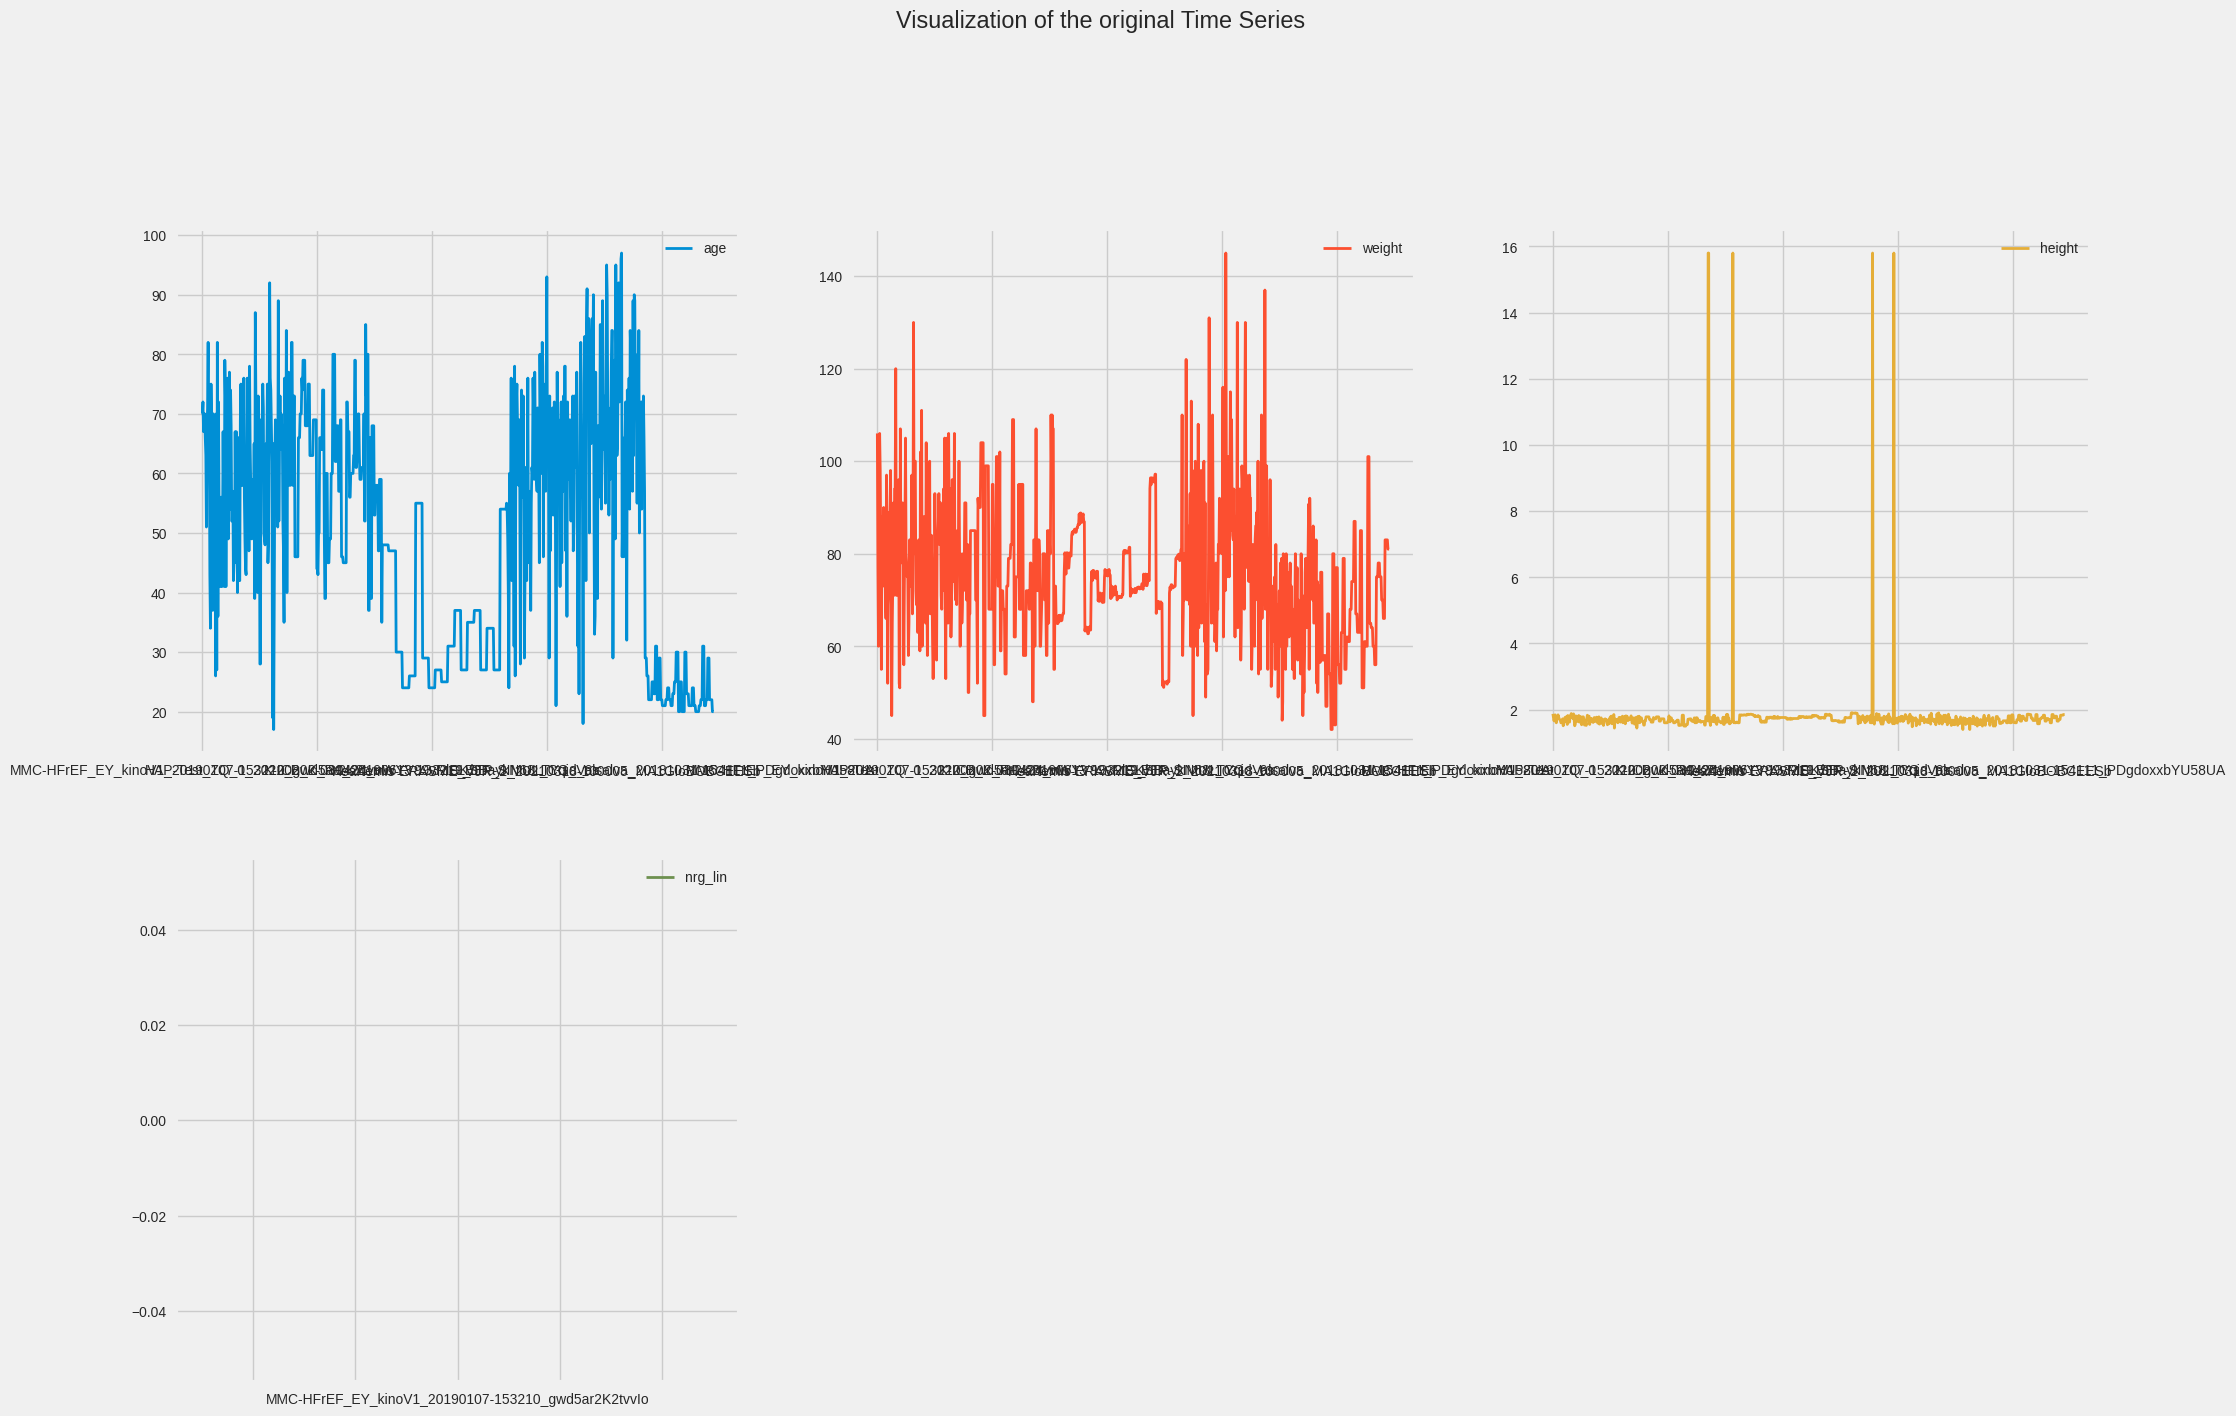

In [246]:
# Visualize the dataframes
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
df_all.plot(subplots=True,
            layout=(3, 3),
            figsize=(22, 22),
            fontsize=10,
            linewidth=2,
            sharex=False,
            title='Visualization of the original Time Series')
plt.xticks(rotation=90)
plt.show()


In [185]:
import tensorflow as tf
!pip install tensorflow - -quiet
print(tf.__version__)


2.8.0


In [ ]:
# Create Deep Learning Model for Time Series Classification
# Import Keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.regularizers import l2
import time
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_all['nrg_lin'], df_all['hf_type'], test_size=0.8, random_state=42)


# Reshape the data to fit the model:
X_train = X_train.values.reshape(X_train.shape[0], 1, 1)
y_train = y_train.values.reshape(y_train.shape[0], 1, 1)

X_val = X_train[:int(X_train.shape[0]*0.2)]
y_val = y_train[:int(y_train.shape[0]*0.2)]

# Let's make a list of CONSTANTS for modelling:
T = 1                                # number of timesteps
# number of units in hidden and output layers
LAYERS = [8, 8, 8, 1]
M_TRAIN = X_train.shape[0]           # number of training examples (2D)
# number of test examples (2D),full=X_test.shape[0]
M_TEST = X_test.shape[0]
N = X_train.shape[0]                 # number of features
BATCH = M_TRAIN                          # batch size
EPOCH = 50                           # number of epochs
LR = 5e-2                            # learning rate of the gradient descent
LAMBD = 3e-2                         # lambda in L2 regularizaion
DP = 0.0                             # dropout rate
RDP = 0.0                            # recurrent dropout rate
print(f'layers={LAYERS}, train_examples={M_TRAIN}, test_examples={M_TEST}')
print(f'batch = {BATCH}, timesteps = {T}, features = {N}, epochs = {EPOCH}')
print(f'lr = {LR}, lambda = {LAMBD}, dropout = {DP}, recurr_dropout = {RDP}')

# Define the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=LR,  epsilon=1e-07,)


# Build the Model
model = Sequential()
model.add(LSTM(input_shape=(1, 713), units=LAYERS[0],
               activation='tanh', recurrent_activation='hard_sigmoid',
               kernel_regularizer=l2(LAMBD), recurrent_regularizer=l2(LAMBD),
               dropout=DP, recurrent_dropout=RDP,
               return_sequences=True, return_state=False,
               stateful=False, unroll=False
               ))
model.add(BatchNormalization())
model.add(LSTM(units=LAYERS[1],
               activation='tanh', recurrent_activation='hard_sigmoid',
               kernel_regularizer=l2(LAMBD), recurrent_regularizer=l2(LAMBD),
               dropout=DP, recurrent_dropout=RDP,
               return_sequences=True, return_state=False,
               stateful=False, unroll=False
               ))
model.add(BatchNormalization())
model.add(LSTM(units=LAYERS[2],
               activation='tanh', recurrent_activation='hard_sigmoid',
               kernel_regularizer=l2(LAMBD), recurrent_regularizer=l2(LAMBD),
               dropout=DP, recurrent_dropout=RDP,
               return_sequences=False, return_state=False,
               stateful=False, unroll=False
               ))
model.add(BatchNormalization())
model.add(Dense(units=LAYERS[3], activation='sigmoid'))

# Compile the model with Adam optimizer
model.compile(loss='binary_crossentropy',
              metrics=['accuracy'],
              optimizer=optimizer)
print(model.summary())

# Define a learning rate decay method:
lr_decay = ReduceLROnPlateau(monitor='loss',
                             patience=1, verbose=0,
                             factor=0.5, min_lr=1e-8)
# Define Early Stopping:
early_stop = EarlyStopping(monitor='val_acc', min_delta=0,
                           patience=30, verbose=1, mode='auto',
                           baseline=0, restore_best_weights=True)
# Train the model.
# The dataset is small for NN - let's use test_data for validation
History = model.fit(X_train, y_train,
                    epochs=EPOCH,
                    batch_size=BATCH,
                    validation_split=0.2,
                    validation_data=(X_test, y_test),
                    shuffle=True, verbose=0,
                    callbacks=[lr_decay, early_stop])
print('-'*65)
print
# Evaluate the model:
train_loss, train_acc = model.evaluate(X_train, y_train,
                                       batch_size=M_TRAIN, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test,
                                     batch_size=1000, verbose=0)
print('-'*65)
print(f'train accuracy = {round(train_acc * 100, 4)}%')
print(f'test accuracy = {round(test_acc * 100, 4)}%')
print(
    f'test error = {round((1 - test_acc) * M_TEST)} out of {M_TEST} examples')

# Plot the loss and accuracy curves over epochs:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
axs[0].plot(History.history['loss'], color='b', label='Training loss')
axs[0].plot(History.history['val_loss'], color='r', label='Validation loss')
axs[0].set_title("Loss curves")
axs[0].legend(loc='best', shadow=True)
axs[1].plot(History.history['acc'], color='b', label='Training accuracy')
axs[1].plot(History.history['val_acc'], color='r', label='Validation accuracy')
axs[1].set_title("Accuracy curves")
axs[1].legend(loc='best', shadow=True)
plt.show()
